<a href="https://colab.research.google.com/github/humbertoalcantaraluna/Final_Project_Ironhack/blob/main/Notebook_Final_Project_HAL_DAPT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis

The whole concept of association rule-mining is based on the concept that customer purchase behavior has a pattern which can be exploited for selling more items to the customer in the future.

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness. This rule-based approach also generates new rules as it analyzes more data. The ultimate goal, assuming a large enough dataset, is to help a machine mimic the human brain's feature extraction and abstract association capabilities from new uncategorized data.


$$
\large
\{ antecedente \implies consecuente\}
$$

Concepts:

1. Support
2. Confidence
3. Lift

## Data Extraction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/mi_drive')

Mounted at /content/mi_drive


In [ ]:
excel=pd.ExcelFile("/content/mi_drive/MyDrive/[Ironhack]/Final Project Data/data.xlsx")

In [ ]:
excel.sheet_names

['Online Retail']

In [ ]:
datos=excel.parse("Online Retail")

In [ ]:
datos.shape

(541909, 8)

## Data Analysis

In [ ]:
datos.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
datos.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
datos.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
datos.isnull().sum()/datos.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [ ]:
datos.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
datos['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
datos['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [ ]:
datos.describe(include='all').T

<ipython-input-15-5877251fddfc>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  datos.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,NaT,NaT,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,NaT,NaT,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,NaT,NaT,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [ ]:
#Vamos a eliminar las columnas que no son necesarias en este analisis
#datos.drop(columns=['CustomerID'],inplace=True)
datos.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Vamos llenar los nulls de description con una leyenda
datos.Description.fillna('missing')

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [ ]:
datos.Description.isnull().sum()

1454

In [ ]:
datos.isnull()[datos.isnull()['Description'] == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,False,False,True,False,False,False,True,False
1970,False,False,True,False,False,False,True,False
1971,False,False,True,False,False,False,True,False
1972,False,False,True,False,False,False,True,False
1987,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...
535322,False,False,True,False,False,False,True,False
535326,False,False,True,False,False,False,True,False
535332,False,False,True,False,False,False,True,False
536981,False,False,True,False,False,False,True,False


In [ ]:
datos.loc[622]

InvoiceNo                   536414
StockCode                    22139
Description                    NaN
Quantity                        56
InvoiceDate    2010-12-01 11:52:00
UnitPrice                      0.0
CustomerID                     NaN
Country             United Kingdom
Name: 622, dtype: object

In [ ]:
datos.fillna('missing', inplace = True)

In [ ]:
datos.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Generando la tabla en formato MBA
pivote=pd.pivot_table(datos[datos['Country']=='United Kingdom'],"Quantity","InvoiceNo","Description")
pivote

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C581490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C581499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivote=pivote.applymap(lambda x: 1 if x>0 else 0)

In [ ]:
pivote

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_uk = datos[datos['Country']=='United Kingdom']
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
items = df_uk.groupby('Description').count()[['Quantity']].reset_index().sort_values(by='Quantity',ascending=False)
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4202 entries, 3898 to 4201
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  4202 non-null   object
 1   Quantity     4202 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 98.5+ KB


## Data Modeling

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
frecuentes=apriori(pivote, min_support=0.02, use_colnames=True).sort_values("support", ascending=False)
frecuentes.shape

(209, 2)

In [ ]:
frecuentes

,support,itemsets
163,0.092194,(WHITE HANGING HEART T-LIGHT HOLDER)
70,0.082489,(JUMBO BAG RED RETROSPOT)
130,0.071720,(REGENCY CAKESTAND 3 TIER)
110,0.067847,(PARTY BUNTING)
90,0.059249,(LUNCH BAG RED RETROSPOT)
...,...,...
190,0.020175,"(JUMBO BAG WOODLAND ANIMALS, JUMBO BAG RED RET..."
65,0.020090,(JUMBO BAG DOILEY PATTERNS)
136,0.020090,(SET OF 12 FAIRY CAKE BAKING CASES)
97,0.020090,(METAL 4 HOOK HANGER FRENCH CHATEAU)


In [ ]:
frecuentes['Length'] = frecuentes['itemsets'].apply(lambda x: len(x))

In [ ]:
frecuentes[frecuentes['Length'] >= 2].shape

(33, 3)

In [ ]:
frecuentes[frecuentes['Length'] >= 2]

,support,itemsets,Length
186,0.033413,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",2
182,0.029837,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",2
192,0.029710,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",2
191,0.027965,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",2
197,0.025836,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2
181,0.024559,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",2
184,0.024262,"(JUMBO BAG BAROQUE BLACK WHITE, JUMBO BAG RED...",2
176,0.023964,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
202,0.023580,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",2
206,0.023240,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",2


In [ ]:
df_assoc = association_rules(frecuentes, metric="lift", min_threshold=1).sort_values("lift", ascending=False)
df_assoc.shape

(70, 9)

In [ ]:
df_assoc.reset_index().drop(columns = ['index'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.029923,0.029837,0.020984,0.701280,23.503392,0.020091,3.247735
1,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.029837,0.029923,0.020984,0.703281,23.503392,0.020091,3.269348
2,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.039755,0.023240,0.020984,0.527837,22.712470,0.020060,2.068694
3,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023240,0.039755,0.020984,0.902930,22.712470,0.020060,9.892337
4,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024559,0.040734,0.020984,0.854419,20.975684,0.019984,6.589245
...,...,...,...,...,...,...,...,...,...
65,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.082489,0.048225,0.027965,0.339009,7.029730,0.023987,1.439922
66,(JUMBO BAG RED RETROSPOT),(JUMBO BAG APPLES),0.082489,0.037669,0.021623,0.262126,6.958628,0.018515,1.304194
67,(JUMBO BAG APPLES),(JUMBO BAG RED RETROSPOT),0.037669,0.082489,0.021623,0.574011,6.958628,0.018515,2.153838
68,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.082489,0.059249,0.022602,0.273994,4.624433,0.017714,1.295789


<function matplotlib.pyplot.show(close=None, block=None)>

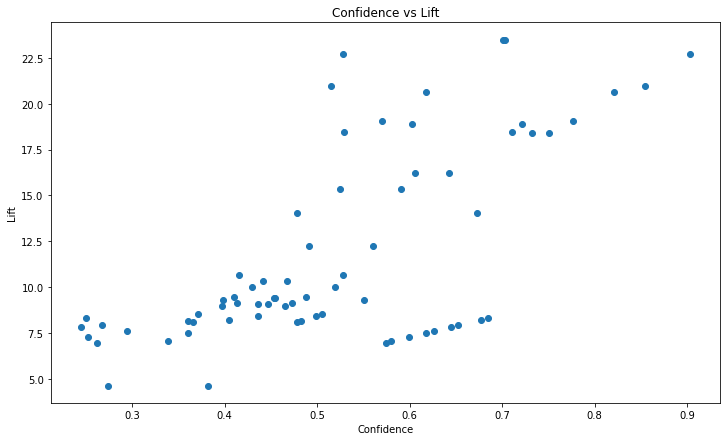

In [ ]:
fig = plt.figure(figsize = (12, 7))
plt.scatter(df_assoc.confidence,df_assoc.lift)
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Confidence vs Lift")
plt.show

In [ ]:
df_assoc[(df_assoc.lift > 10) & (df_assoc.confidence > 0.5)].shape

(24, 9)

In [ ]:
df_assoc[(df_assoc.lift > 10) & (df_assoc.confidence > 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.029923,0.029837,0.020984,0.701280,23.503392,0.020091,3.247735
48,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.029837,0.029923,0.020984,0.703281,23.503392,0.020091,3.269348
51,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.039755,0.023240,0.020984,0.527837,22.712470,0.020060,2.068694
50,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023240,0.039755,0.020984,0.902930,22.712470,0.020060,9.892337
49,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024559,0.040734,0.020984,0.854419,20.975684,0.019984,6.589245
52,(ROSES REGENCY TEACUP AND SAUCER ),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.040734,0.024559,0.020984,0.515152,20.975684,0.019984,2.011846
11,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029923,0.039755,0.024559,0.820768,20.645746,0.023370,5.357558
10,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.039755,0.029923,0.024559,0.617773,20.645746,0.023370,2.537962
19,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029923,0.040734,0.023240,0.776671,19.066999,0.022021,4.295313
18,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.040734,0.029923,0.023240,0.570533,19.066999,0.022021,2.258794


# Amazon Data

In [ ]:
df = pd.read_csv('/content/mi_drive/MyDrive/[Ironhack]/Final Project Data/Sales_OctNovDec_2019.csv')

In [ ]:
df.shape

(63040, 6)

In [ ]:
df.isnull().sum()

Order ID            187
Product             187
Quantity Ordered    187
Price Each          187
Order Date          187
Purchase Address    187
dtype: int64

In [ ]:
df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358.0,34in Ultrawide Monitor,1.0,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [ ]:
pivote=pd.pivot_table(df,"Quantity Ordered","Order ID","Product")
pivote

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
259358.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259359.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259360.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259361.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319666.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
319667.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319668.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [ ]:
pivote=pivote.applymap(lambda x: 1 if x>0 else 0)

In [ ]:
pivote.head()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
259358.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259359.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259360.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
259361.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259362.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
frecuentes=apriori(pivote, min_support=0.0005, use_colnames=True).sort_values("support", ascending=False)

In [ ]:
frecuentes.shape

(36, 2)

In [ ]:
frecuentes

,support,itemsets
15,0.123887,(USB-C Charging Cable)
12,0.121765,(Lightning Charging Cable)
5,0.116940,(AAA Batteries (4-pack))
4,0.114668,(AA Batteries (4-pack))
17,0.106196,(Wired Headphones)
6,0.086466,(Apple Airpods Headphones)
7,0.074196,(Bose SoundSport Headphones)
2,0.040771,(27in FHD Monitor)
18,0.037902,(iPhone)
1,0.035714,(27in 4K Gaming Monitor)


In [ ]:
df_assoc = association_rules(frecuentes, metric="lift", min_threshold=1).sort_values("lift", ascending=False)
df_assoc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(USB-C Charging Cable),(Vareebadd Phone),0.123887,0.011026,0.002155,0.017398,1.577959,0.000789,1.006485
5,(Vareebadd Phone),(USB-C Charging Cable),0.011026,0.123887,0.002155,0.195489,1.577959,0.000789,1.089000
0,(Google Phone),(USB-C Charging Cable),0.029894,0.123887,0.005190,0.173600,1.401273,0.001486,1.060155
1,(USB-C Charging Cable),(Google Phone),0.123887,0.029894,0.005190,0.041890,1.401273,0.001486,1.012520
2,(Lightning Charging Cable),(iPhone),0.121765,0.037902,0.005090,0.041803,1.102911,0.000475,1.004071
3,(iPhone),(Lightning Charging Cable),0.037902,0.121765,0.005090,0.134296,1.102911,0.000475,1.014475
